In [23]:
import pandas as pd
import re 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barbara.Zamora\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
import seaborn as sns
import matplotlib.pyplot as plot
from matplotlib import pyplot

In [29]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\Barbara.Zamora\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


In [ ]:
#Objetive :Our goal is to be able to correctly predict the positive reviews, 
#in order to apply this model in the future with the advance of the store 
#and evaluate how it is being received by the public.

In [10]:
#We are going to import our file:
dataset = pd.read_csv('Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')


In [11]:
dataset.head()

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0
2      Cant say enough good things about this place.      1
3                       The ambiance was incredible.      1
4          The waitress and manager are so friendly.      1

In [12]:
len(dataset)

500

In [20]:
dataset.tail()

Review  Liked
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

In [25]:
Liked = dataset.Liked
Liked.value_counts()

1    250
0    250
Name: Liked, dtype: int64

In [53]:
Liked.value_counts(normalize=True)

1    0.5
0    0.5
Name: Liked, dtype: float64

In [ ]:
# Here we can see that 50% of the public liked. 

In [54]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [55]:
dataset.Liked.mean()

0.5

In [57]:
dataset.Liked.std()

0.5005007512521914

In [ ]:
#Here we are going to choose NLTK library to do our predictions, because is very complete and I can used with this kind of data

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] 

In [24]:
#Here we are going to clean our data: Put all the words in lower case, separate different words and clean in general
#for the next analysis
for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
    review = review.lower() 
    review = review.split() 
    ps = PorterStemmer() 
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    corpus.append(review) 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer 
#Here we are going to create our vectors, to put it in the next step (create train and test data):

cv = CountVectorizer(max_features = 1000) 

X = cv.fit_transform(corpus).toarray() 

y = dataset.iloc[:, 1].values 

In [30]:
from sklearn.model_selection import train_test_split

#We are going to separate our data in Train Data and Test Data, where our test size is 20% of the data 
#(and train data is 80%):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Gaussian NB model, why?
#Works well with small datasets and is good enough to classifed 

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

#Logistic Regression Model, because we have binary v.a.
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

[[27 23]
 [ 6 44]]
[[35 15]
 [15 35]]


In [ ]:
#What means the confusion matrix? Is a table that shows if our model is good enouhg or not
#Shows % if our predictions are correct.
#The first matrix is the result of Gaussian NB Model
#   1. True Positive: 27% of our data (135) had a good prediction (reality = prediction) 
#   2. False Negative: 23% of out data (115) had a bad prediction, the model said that value is "1" and in the reality is "0"
#   3. True Negative: 44% of our data (220) had a good prediction (reality = prediction) 
#   4. False Positive: 6% of our data (300) had a bad prediction, the model said that value is "0" and in the reality is "1"

#The second matrix is the result of Logistic Regression Model
#   1. True Positive: 35% of our data (175) had a good prediction (reality = prediction) 
#   2. False Negative: 15% of out data (75) had a bad prediction, the model said that value is "1" and in the reality is "0"
#   3. True Negative: 35% of our data (175) had a good prediction (reality = prediction) 
#   4. False Positive: 15% of our data (75) had a bad prediction, the model said that value is "0" and in the reality is "1"

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.710
Logistic: ROC AUC=0.768


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.88  0.46
2        0.0  1.00  1.00

threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00

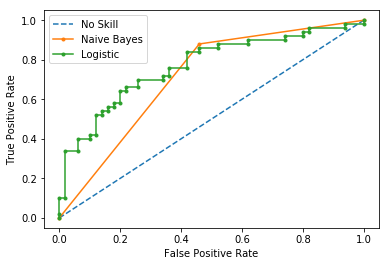

LR Sensitivity: 0.4
LR Specificity: 0.9
NB Sensitivity: 0.88
NB Specificity: 0.54


In [35]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

In [ ]:
#To begin, we can analyze the AUC of each model:
# 1. GNB Model : 0.710
# 2. Logistic Regression Model: 0.768
#Only considering this values, we can said that Logistic Regression Model is better than GNB

In [ ]:
#In the graphic, we can see differents cut off values, with their respective true positive and false positive rates.
#Sensitivity (TPR):  Correct proportion of actual positives that are correctly identified
#Specifity (FPR): Correct proportion of actual negatives that are correctly identified

In [ ]:
#In the graphic is better GNB Model, that we can see this model has better sensibility (0.88 > 0.4) and specifity (0.54 <  0.9), but this is only one spot

In [ ]:
# However, AUC is the general number of the graphic, so this give me a concret number to compare
#Our best model in this "test" is Logistic Regression

In [ ]:
#Remember: Our objective is has more positive reviews; we need high sensibility and low specifity

In [44]:
#Now, we are going to compare with Decision Tree Model:
#Why? 
#a.Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
#b.Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dt_X_train = sc.fit_transform(X_train)
dt_X_test = sc.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier


In [45]:
#Why our criterion is 'entropy'?
#Is to calculate the homogeneity of a sample. 
#If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.
classifer_dt= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifer_dt.fit(dt_X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
dt_y_pred=classifer_dt.predict(dt_X_test)

In [47]:
dt_cm = confusion_matrix(y_test, dt_y_pred)
print(dt_cm)

[[32 18]
 [13 37]]


In [ ]:
#This matrix is the result of Decision Tree Model
#   1. True Positive: 32% of our data (160) had a good prediction (reality = prediction) 
#   2. False Negative: 18% of out data (90) had a bad prediction, the model said that value is "1" and in the reality is "0"
#   3. True Negative: 37% of our data (185) had a good prediction (reality = prediction) 
#   4. False Positive: 13% of our data (65) had a bad prediction, the model said that value is "0" and in the reality is "1"

#Notice: These values are similar of LG Model

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.690
Logistic: ROC AUC=0.781
Naive Bayes: ROC AUC=0.700


threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.78  0.38
2        0.0  1.00  1.00

threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.74  0.36
2        0.0  1.00  1.00

threshold   tpr   fpr
0   2.000000e+00  0.00  0.00
1   1.000000e+00  0.02  0.00
2   1.000000e+00  0.10  0.00
3   9.999999e-01  0.10  0.02
4   9.999989e-01  0.18  0.02
5   9.999988e-01  0.18  0.04
6   9.999975e-01  0.24  0.04
7   9.999780e-01  0.24  0.08
8   9.990168e-01  0.40  0.08
9   9.987466e-01  0.40  0.10
10  9.987094e-01  0.42  0.10
11  9.985816e-01  0.42  0.12
12  9.966813e-01  0.46  0.12
13  9.941222e-01  0.46  0.14
14  9.926011e-01  0.50  0.14
15  9.878143e-01  0.50  0.16
16  9.744260e-01  0.60  0.16
17  9.413045e-01  0.60  0.18
18  8.924730e-01  0.62  0.18
19  7.917486e-01  0.62  0.26
20  6.780249e-01  0.66  0.26
21  5.262148e-01  0.66  0.28
22  4.663695e-01  0.68  0.28
23  3.739192e-01  0.68  0.32
24  1.746263e-01  0.74  0.32
25  1.525898e-01  0.74  0.34
26  7.154487e-02  0.80  0.34
27  5.903010e-02  0.80  0.38
28  4.427466e-02  0.82  0.38
29  3.947213e-02  0.82  0.40
30  3.840621e-02  0.84  0.40
31  3.429049e-02  0.84  0.42
32  2.696766e-02  0.86  0.42
33  2.399609e-02  0.86  0.44
34  1.057708e-02  0.92  0.44
35  6.570161e-04  0.92  0.70
36  4.233507e-04  0.94  0.70
37  2.814748e-04  0.94  0.72
38  1.821122e-04  0.96  0.72
39  4.600501e-05  0.96  0.78
40  4.532160e-05  0.98  0.78
41  6.943206e-09  0.98  1.00
42  2.886102e-12  1.00  1.00

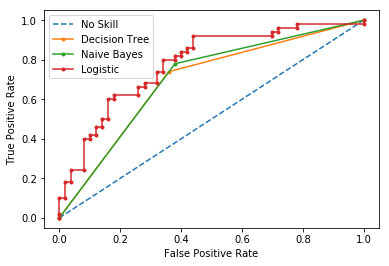

LR Sensitivity: 0.62
LR Specificity: 0.74
DT Sensitivity: 0.74
DT Specificity: 0.64
NB Sensitivity: 0.78
NB Specificity: 0.62


In [52]:
# predict probabilities
dt_probs = classifer_dt.predict_proba(dt_X_test)
lr_probs = classifier_lr.predict_proba(X_test)
nb_probs = classifier_nb.predict_proba(X_test)


# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, dt_thresholds  = roc_curve(y_test, dt_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

dt_df = pd.DataFrame(data=[])
dt_df['threshold'] = dt_thresholds
dt_df['tpr'] = dt_tpr
dt_df['fpr'] = dt_fpr
display(dt_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_dt(threshold):
    print('DT Sensitivity:', dt_tpr[dt_thresholds > threshold][-1])
    print('DT Specificity:', 1 - dt_fpr[dt_thresholds > threshold][-1])

def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(0.75)
evaluate_threshold_dt(0.75)
evaluate_threshold_nb(0.75)

In [ ]:
#Only seeing AUC vaklues, we can analyze for each model:
# 1. GNB Model : 0.700
# 2. Logistic Regression Model: 0.781
# 3. Decision Tree Model: 0.69
#Only considering this values, we can said that Logistic Regression Model is better than others


#However, seeing the graphic (and the evaluation of the threshold in 75%), we can analyze that GNB Model has better results 
#in line of our objetive
#This is because we are looking for minimum value of specificity and maximm value of sensitivity
#But! Here we are only seeing one spot!


# First Graphic
#LR Sensitivity: 0.4
#LR Specificity: 0.9
#NB Sensitivity: 0.88
#NB Specificity: 0.54

# Second Graphic
#LR Sensitivity: 0.62
#LR Specificity: 0.74
#DT Sensitivity: 0.74
#DT Specificity: 0.64
#NB Sensitivity: 0.78
#NB Specificity: 0.62


In [60]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, nb_y_pred)
print('Precision of GNB:')
print(precision)

Precision of GNB:
0.6567164179104478


In [63]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, dt_y_pred)
print('Precision of Decision Tree:')
print(precision)

Precision of Decision Tree:
0.6727272727272727


In [65]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, lr_y_pred)
print('Precision of Logistic Regression:')
print(precision)

Precision of Logistic Regression:
0.7


In [ ]:
#Logistic Regression has the better precision!

In [ ]:
#Conclusion:
# 1. The model that give me the best result in concordance with our objective is LR, because in the 2 "test", this model gets the best results in sensibility and specitivity
# 2. Although our models do not have a very high precision, this means that it is not overfitting (or underfitting, because is greater than 50%)
# -> It's going to depend of our criteria which value of precision is enough. In this case, our three models are stables
# -> The precision of our three models is appropied!
# 3. The best result in Sensibility vs Specificity and precision is LR. 